In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Load data

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


Chuẩn hóa dữ liệu input

In [ ]:
X_train_scaled = np.array(X_train) / 255
X_test_scaled = np.array(X_test) / 255

Chuẩn hóa dữ liệu output

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1, 1))
y_train = encoder.transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

Xây dựng mô hình CNN:

In [ ]:
#CNN model
inp = Input(shape  = (28, 28, 1)) #input shape
cnn = Conv2D(filters=8, kernel_size=3, activation ='relu') (inp)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop =  Dropout(0.2)(pooling)

cnn = Conv2D(filters=16, kernel_size= 4, activation= 'relu') (drop)
pooling = MaxPooling2D (pool_size=(2,2)) (cnn)
drop =  Dropout (0.2) (pooling)

cnn = Conv2D(filters=32, kernel_size = 4, activation="relu") (drop)
pooling = MaxPooling2D(pool_size=(2,2)) (cnn)
f = Flatten()(pooling)
fc1 = Dense (units=32, activation='relu') (f)
fc2 = Dense (units=16, activation='relu') (fc1)
out = Dense(units=10, activation='softmax') (fc2)
model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2064      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                      

Huấn luyện mô hình:

In [ ]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, batch_size = 64, epochs=50,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/50
938/938 [==============================] - 23s 22ms/step - loss: 1.5171 - accuracy: 0.4810 - val_loss: 0.4889 - val_accuracy: 0.8818
Epoch 2/50
938/938 [==============================] - 22s 23ms/step - loss: 0.5118 - accuracy: 0.8482 - val_loss: 0.2720 - val_accuracy: 0.9310
Epoch 3/50
938/938 [==============================] - 20s 21ms/step - loss: 0.3656 - accuracy: 0.8899 - val_loss: 0.2036 - val_accuracy: 0.9443
Epoch 4/50
938/938 [==============================] - 22s 23ms/step - loss: 0.2995 - accuracy: 0.9088 - val_loss: 0.1682 - val_accuracy: 0.9531
Epoch 5/50
938/938 [==============================] - 20s 21ms/step - loss: 0.2586 - accuracy: 0.9218 - val_loss: 0.1479 - val_accuracy: 0.9578
Epoch 6/50
938/938 [==============================] - 22s 24ms/step - loss: 0.2319 - accuracy: 0.9302 - val_loss: 0.1336 - val_accuracy: 0.9631
Epoch 7/50
938/938 [==============================] - 20s 22ms/step - loss: 0.2062 - accuracy: 0.9370 - val_loss: 0.1185 - val_accuracy:

Trực quan hóa kết quả Accuracy và Loss trên tập Train và Test

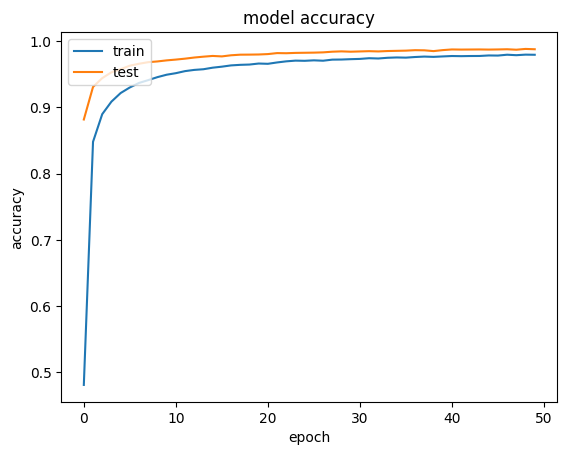

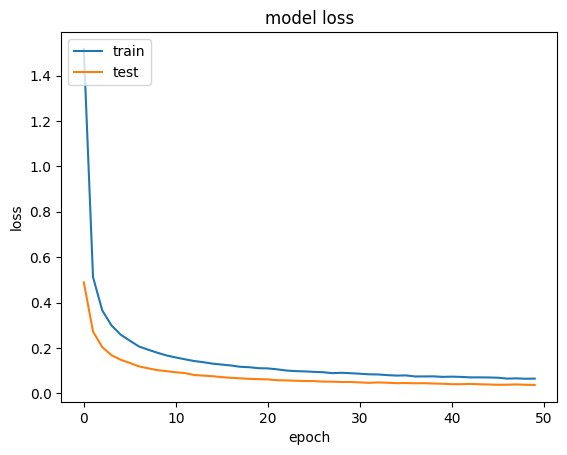

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Lưu mô hình:

In [ ]:
model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Load mô hình đã lưu từ máy:

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.h5')

Load ảnh và sử dụng mô hình đã huấn luyện để nhận biết:

(496, 484, 3)


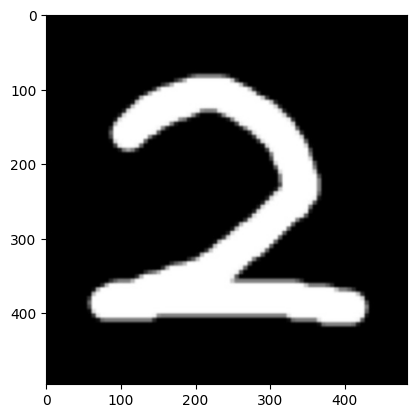

In [ ]:
import cv2
img =cv2.imread('so2.jpg')
print(img.shape)
plt.imshow(img)

(496, 484)


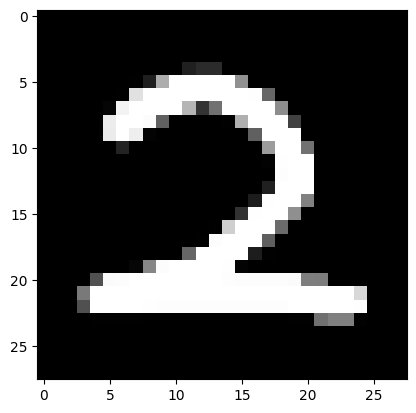

In [ ]:
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
img_new=cv2.resize(gray_img,(28,28))
print(gray_img.shape)

plt.imshow(img_new, cmap = 'gray')

In [ ]:
img_scaled = np.array([img_new/255.])
print(img_scaled.shape)
y_hat = model1.predict(img_scaled)
print(y_hat)
print(np.argmax(y_hat))

(1, 28, 28)
1/1 [==============================] - 0s 142ms/step
[[3.2107456e-10 8.0645050e-06 9.9999094e-01 3.3462928e-07 9.5035611e-13
  2.4472755e-09 1.2083551e-13 6.0312311e-07 2.5206068e-08 1.8027368e-12]]
2


**Bài tập:**
- Thay đổi mạng CNN theo ý kiến của riêng mình sao cho kết quả tốt nhất.
- Sử dụng classification_report trong thư viện Sklearn đánh giá kết quả mô hình dựa trên kết quả dự đoán tập test.
- Sử dụng Confusion_matrix trong thư viện Sklearn biểu diễn kết quả dự đoán trên tập test.

In [ ]:
# Mô hình CNN cải tiến
inp = Input(shape=(28, 28, 1)) # Input shape

cnn = Conv2D(filters=32, kernel_size=3, activation='relu')(inp)
cnn = MaxPooling2D(pool_size=(2,2))(cnn)
cnn = Dropout(0.25)(cnn)

cnn = Conv2D(filters=64, kernel_size=3, activation='relu')(cnn)
cnn = MaxPooling2D(pool_size=(2,2))(cnn)
cnn = Dropout(0.25)(cnn)

cnn = Conv2D(filters=128, kernel_size=3, activation='relu')(cnn)
cnn = MaxPooling2D(pool_size=(2,2))(cnn)
cnn = Dropout(0.25)(cnn)

f = Flatten()(cnn)
fc1 = Dense(units=128, activation='relu')(f)
fc1 = Dropout(0.5)(fc1)
out = Dense(units=10, activation='softmax')(fc1)

model = Model(inputs=inp, outputs=out)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                      

In [ ]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train, batch_size=64, epochs=50,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/50
938/938 [==============================] - 73s 78ms/step - loss: 0.1575 - accuracy: 0.9545 - val_loss: 0.0750 - val_accuracy: 0.9774
Epoch 2/50
938/938 [==============================] - 55s 59ms/step - loss: 0.1481 - accuracy: 0.9564 - val_loss: 0.0678 - val_accuracy: 0.9793
Epoch 3/50
938/938 [==============================] - 55s 59ms/step - loss: 0.1399 - accuracy: 0.9589 - val_loss: 0.0666 - val_accuracy: 0.9786
Epoch 4/50
938/938 [==============================] - 56s 60ms/step - loss: 0.1329 - accuracy: 0.9604 - val_loss: 0.0615 - val_accuracy: 0.9803
Epoch 5/50
938/938 [==============================] - 54s 57ms/step - loss: 0.1251 - accuracy: 0.9630 - val_loss: 0.0620 - val_accuracy: 0.9818
Epoch 6/50
938/938 [==============================] - 54s 57ms/step - loss: 0.1211 - accuracy: 0.9652 - val_loss: 0.0588 - val_accuracy: 0.9827
Epoch 7/50
938/938 [==============================] - 54s 57ms/step - loss: 0.1180 - accuracy: 0.9654 - val_loss: 0.0565 - val_accuracy:

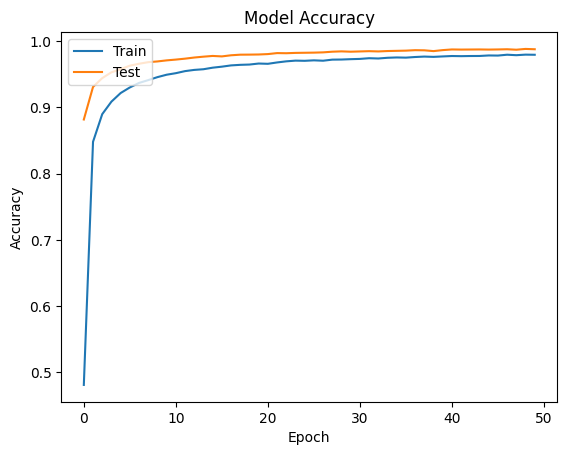

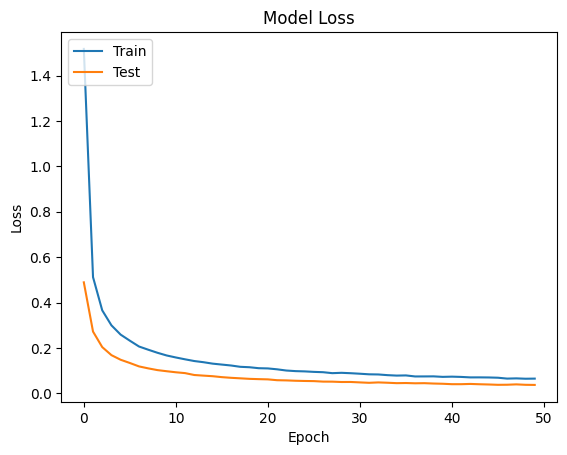

In [ ]:
# Vẽ biểu đồ độ chính xác và mất mát
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Lưu mô hình
model.save('improved_model.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

313/313 [==============================] - 4s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



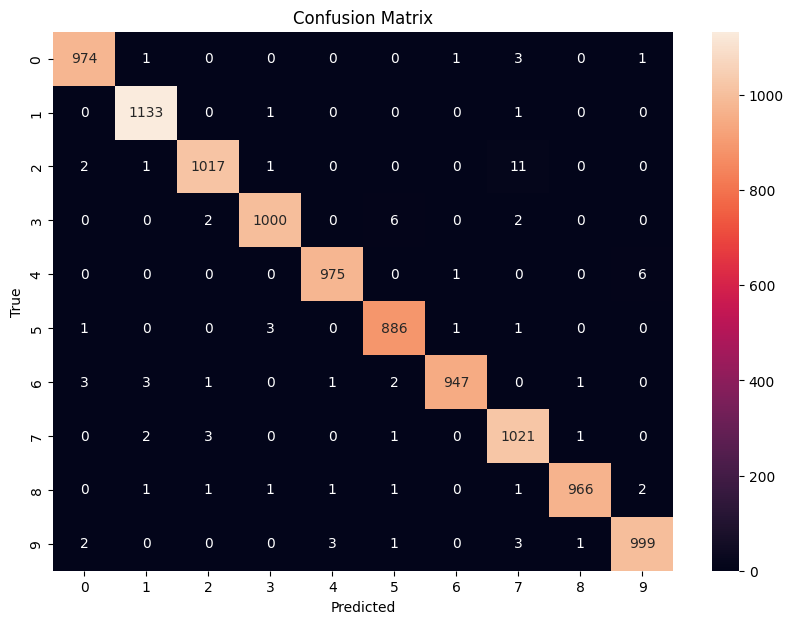

In [ ]:
# Đánh giá mô hình
model1 = tensorflow.keras.models.load_model('improved_model.h5')
y_pred = model1.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()